<a href="https://colab.research.google.com/github/Sahar-bgi/python/blob/main/Brain_Tumor_Detection_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
# upload the Kaggle API
files.upload()

{}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d praneet0327/brain-tumor-dataset

 81% 81.0M/100M [00:00<00:00, 108MB/s]
100% 100M/100M [00:00<00:00, 109MB/s] 


In [ ]:
! unzip brain-tumor-dataset.zip -d brain-tumor-dataset

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random
import cv2
import warnings
from pathlib import Path
import pandas as pd
from glob import glob


In [ ]:
classes = os.listdir("/content/brain-tumor-dataset/Brain_Tumor_Dataset")
classes

['Negative', 'Positive']

In [ ]:
images_file = Path("/content/brain-tumor-dataset/Brain_Tumor_Dataset")

for c in classes:
  print(f' {c}', '=',len(os.listdir(os.path.join(images_file, c))), 'images')

 Negative = 2000 images
 Positive = 3266 images


In [ ]:
#create a dataset to find number of files on both classes
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/brain-tumor-dataset/Brain_Tumor_Dataset")  # Directory path containing the image dataset

Found 5266 files belonging to 2 classes.


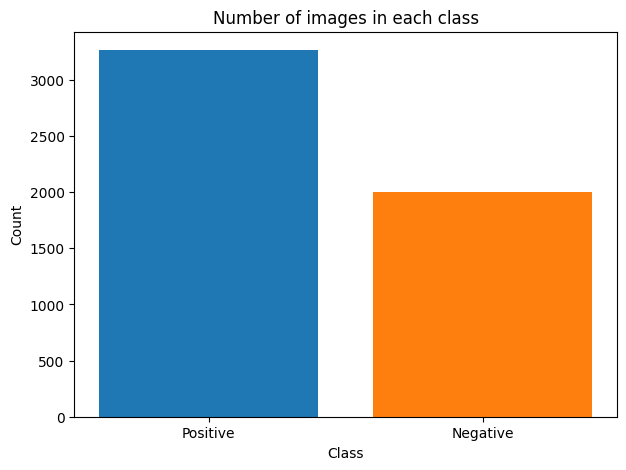

In [ ]:
import matplotlib.pyplot as plt


# An empty dictionary to store the count of images for each class
class_counts = {}

# Count the images in each class
for _, labels in dataset:
    for label in labels.numpy():
        class_name = classes[label]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1

# a bar plot to visualize the count of images in each class
colors = plt.cm.tab10(range(len(class_counts)))
plt.figure(figsize=(7, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of images in each class', fontsize=12)
plt.show()


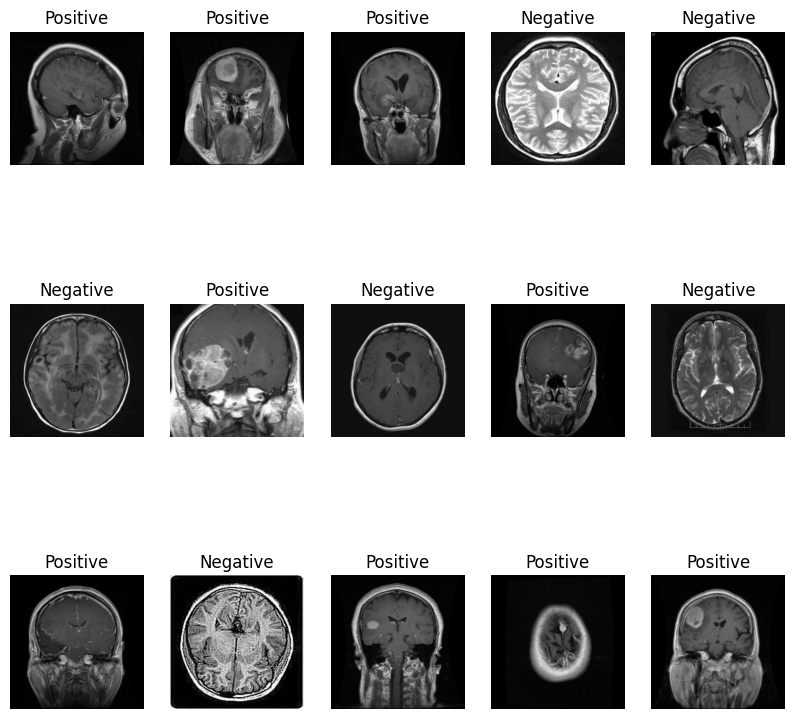

In [ ]:
# Images with their  labels
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for image_batch, label_batch in dataset.take(1):
       for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))

        plt.title(classes[label_batch[i]])
        plt.axis("off")

plt.show()


In [ ]:
# Define paths to  image folders
Positive_file = '/content/brain-tumor-dataset/Brain_Tumor_Dataset/Positive'
Negative_file = '/content/brain-tumor-dataset/Brain_Tumor_Dataset/Negative'

In [ ]:
plt.style.use('ggplot')
Positive_folder=glob('/content/brain-tumor-dataset/Brain_Tumor_Dataset/Positive/*.jpg')
Negative_folder=glob('/content/brain-tumor-dataset/Brain_Tumor_Dataset/Negative/*.jpg')
img_mp1=plt.imread(Positive_folder[20])
img_cv2=cv2.imread(Positive_folder[20])
img_mp1.shape,img_cv2.shape




((512, 512), (512, 512, 3))

In [ ]:
img_mp2=plt.imread(Negative_folder[20])
img_cv2=cv2.imread(Negative_folder[20])
img_mp2.shape,img_cv2.shape

# 217 is hight, 232 weight, 3 is the RGB it s a 3 dimensional arrrey for Negative

((192, 192, 3), (192, 192, 3))

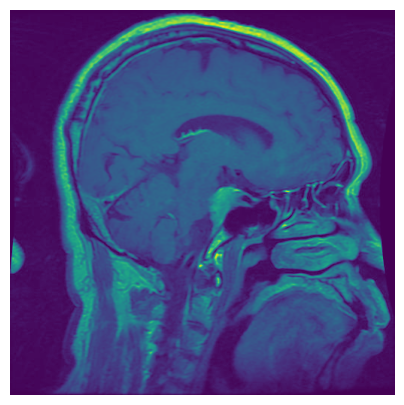

In [ ]:
fig, ax=plt.subplots(figsize=(5,5))
ax.imshow(img_mp1)
ax.axis('off')
plt.show()

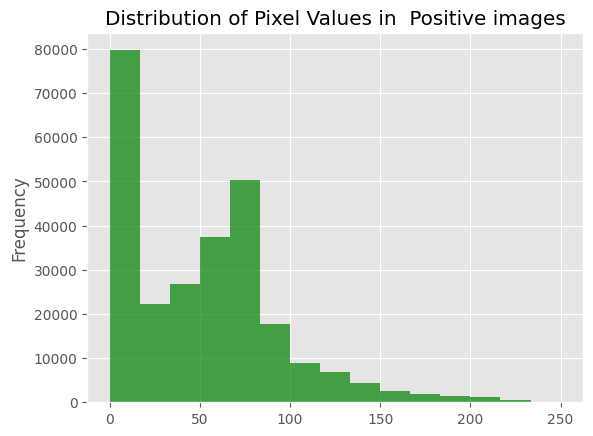

In [ ]:

pd.Series(img_mp1.flatten()).plot(kind='hist',bins=15,range=[0,250],title='Distribution of Pixel Values in  Positive images',color='green',alpha=0.7)
plt.show()


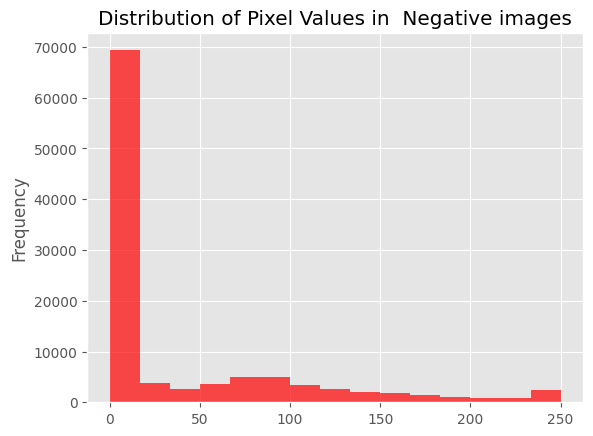

In [ ]:
pd.Series(img_mp2.flatten()).plot(kind='hist',bins=15,range=[0,250],title='Distribution of Pixel Values in  Negative images',color='red',alpha=0.7)
plt.show()

In [ ]:
  import pandas as pd
  import numpy as np

  from glob import glob
  import cv2
  import os
  # initialize lists to store images and labels
  Positive_file = '/content/brain-tumor-dataset/Brain_Tumor_Dataset/Positive'
  Negative_file = '/content/brain-tumor-dataset/Brain_Tumor_Dataset/Negative'
  images = []
  labels = []

  # load and preprocess Negative images
  for filename in os.listdir(Negative_file):
    if filename.endswith('.jpg'):
        original_img = cv2.imread(os.path.join(Negative_file, filename))
        img = cv2.resize(original_img, (128,128))
        # Noramlize pixel value to [0 1]
        img = img.astype(np.float32) / 255.0
        # Sharpen Image
        kernel_sharpening = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel_sharpening)
        images.append(img)
        labels.append(0) # 0 represents Negative_file
    # load and preprocess Positive images
  for filename in os.listdir(Positive_file):
    if filename.endswith('.jpg'):
        original_img = cv2.imread(os.path.join(Positive_file, filename))
        #resize the imagу to a common size
        img = cv2.resize(original_img, (128,128))
        # Noramlize pixel value to [0 1]
        img = img.astype(np.float32) / 255.0
      # Sharpen Image
        kernel_sharpening = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel_sharpening)
        images.append(img)
        labels.append(1) # 1 Positive_file

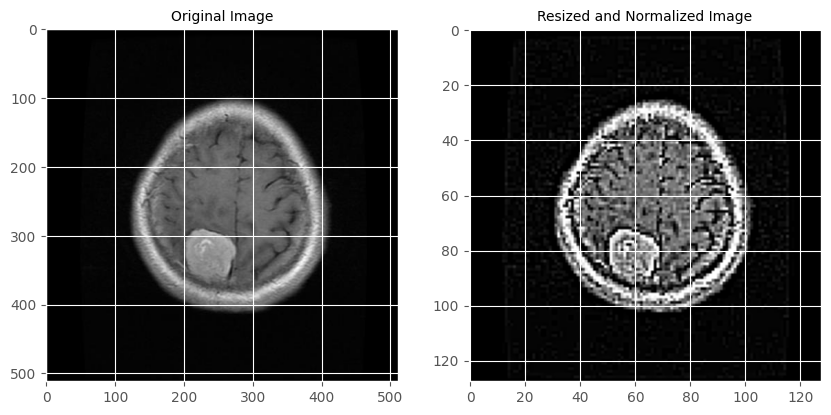

In [ ]:
 # Display the original, resized, , normalized ,Sharpen and blurred  images side by side
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image',fontsize=10)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Resized and Normalized Image',fontsize=10)
plt.show()

In [ ]:
# convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

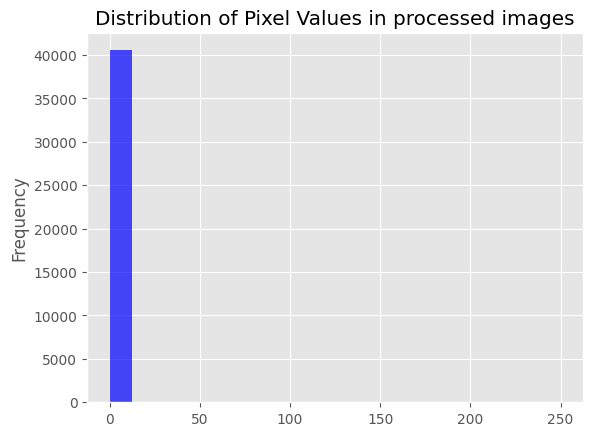

In [ ]:
pd.Series(img.flatten()).plot(kind='hist',bins=20,range=[0,250],title='Distribution of Pixel Values in processed images',color='blue',alpha=0.7)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# split the data into trainig and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(4212, 128, 128, 3)
(1054, 128, 128, 3)


In [ ]:
#import tensorflow as tf
#from tensorflow import keras
#from keras.layers import Dense
#from tensorflow.keras import layers
#model = keras.Sequential([
#    layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(128,128,3)),
#    layers.MaxPooling2D((2,2)),
#    layers.Flatten(),
#    layers.Dense(64,activation = 'relu'),
#    layers.Dense(64,activation = 'relu'),
#    layers.Dense(2,activation = 'softmax')
#])
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(2,activation = 'softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

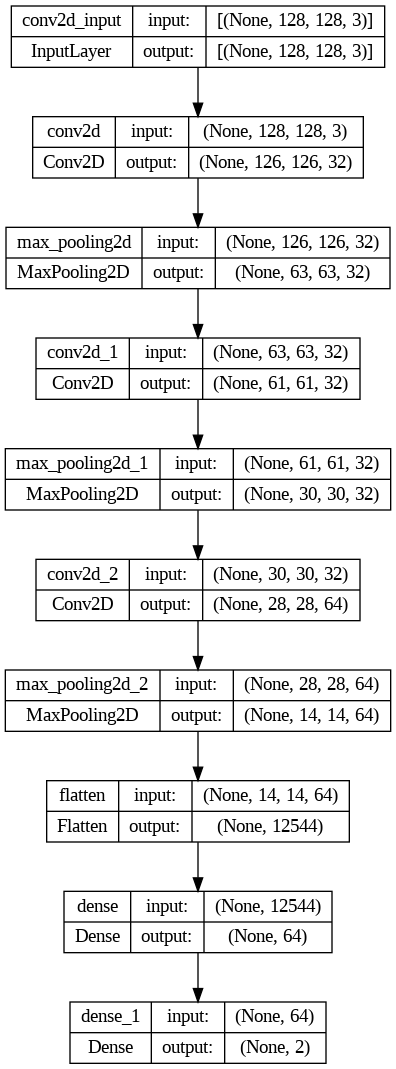

In [ ]:
# model architecture display
tf.keras.utils.plot_model(model,show_shapes=True,expand_nested=True)

In [ ]:
#train the model
history = model.fit(x_train, y_train,epochs=5,batch_size= 32,verbose=1,validation_split=0.2)

Epoch 1/5
106/106 [==============================] - 117s 1s/step - loss: 0.2858 - accuracy: 0.8872 - val_loss: 0.1207 - val_accuracy: 0.9692
Epoch 2/5
106/106 [==============================] - 84s 794ms/step - loss: 0.0939 - accuracy: 0.9668 - val_loss: 0.0970 - val_accuracy: 0.9727
Epoch 3/5
106/106 [==============================] - 73s 686ms/step - loss: 0.0466 - accuracy: 0.9863 - val_loss: 0.0963 - val_accuracy: 0.9739
Epoch 4/5
106/106 [==============================] - 78s 739ms/step - loss: 0.0229 - accuracy: 0.9920 - val_loss: 0.1170 - val_accuracy: 0.9692
Epoch 5/5
106/106 [==============================] - 73s 694ms/step - loss: 0.0101 - accuracy: 0.9964 - val_loss: 0.1148 - val_accuracy: 0.9703


In [ ]:
#evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy:{test_acc}')

33/33 - 9s - loss: 0.1058 - accuracy: 0.9744 - 9s/epoch - 265ms/step
Test accuracy:0.9743832945823669


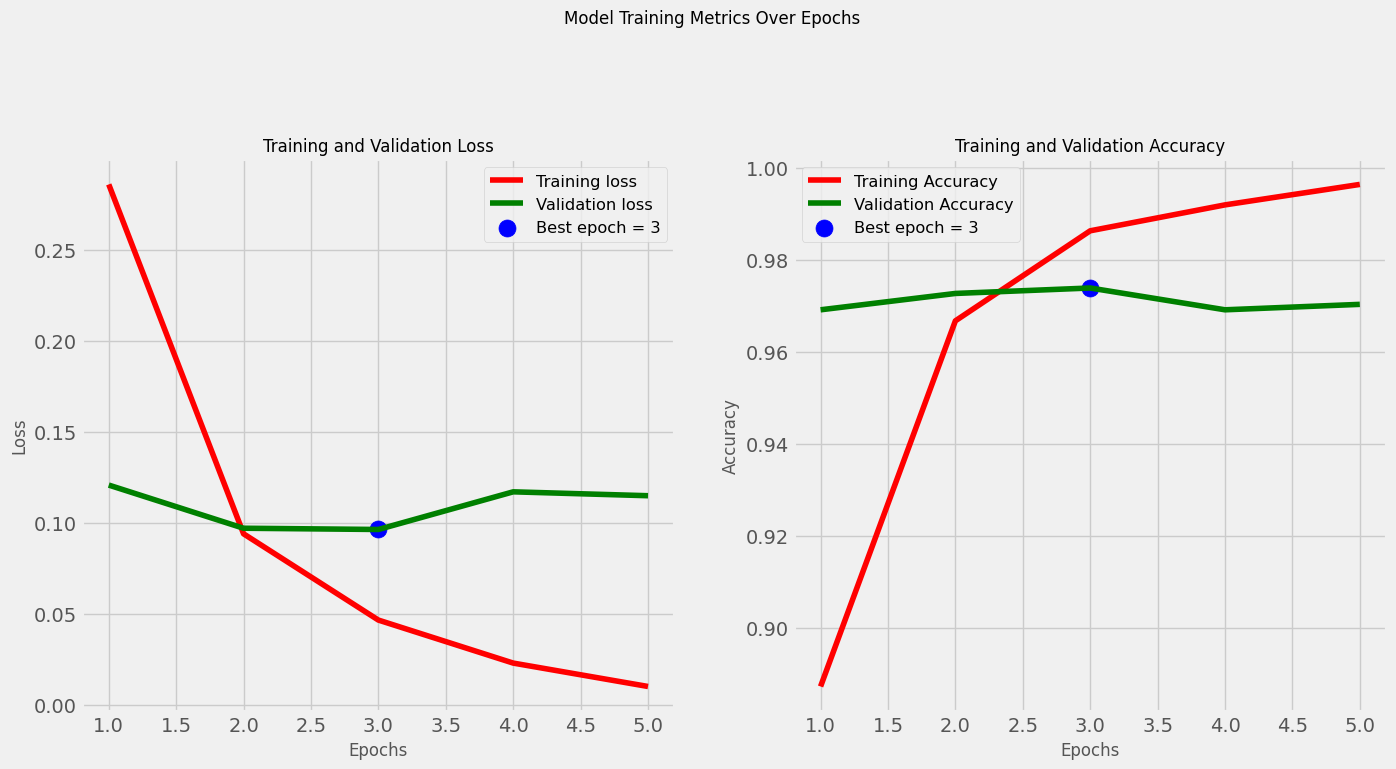

In [ ]:
Epochs=5
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]


Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'

plt.figure(figsize=(15, 15))
plt.style.use('fivethirtyeight')

plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.legend(fontsize='small')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.legend(fontsize='small')
plt.grid(True)


plt.suptitle('Model Training Metrics Over Epochs', fontsize=12)
plt.show()


1/1 [==============================] - 0s 151ms/step


Predicted class: Negative
Actual class: Negative


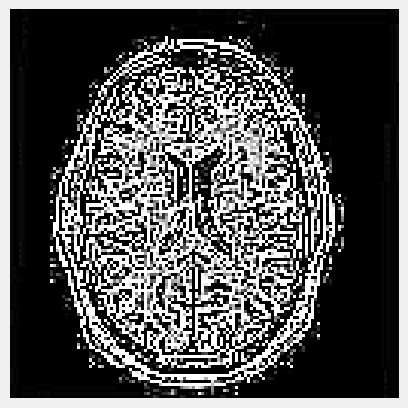

In [ ]:
#predicting on a single image
sample_image_index = 889
sample_image = x_test[sample_image_index]
predictions = model.predict(np.expand_dims(sample_image,axis=0))
predicted_label = np.argmax(predictions)
# dataset's class labels (0 for Negative, 1 for Positive)
class_labels = ['Negative', 'Positive']
predicted_class = class_labels[predicted_label]
actual_class = class_labels[labels[sample_image_index]]  # Use the index directly
print(f'Predicted class: {predicted_class}')
print(f'Actual class: {actual_class}')
# display the sample image
plt.imshow(sample_image)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_labels = []
predicted_labels = []

# Repeat through the test data
for i in range(len(x_test)):
    # Make predictions using model.predict
    predictions = model.predict(np.expand_dims(x_test[i], axis=0))
    predicted_class_number = np.argmax(predictions)

    # Append true and predicted labels to the lists
    true_labels.append(y_test[i])
    predicted_labels.append(predicted_class_number)


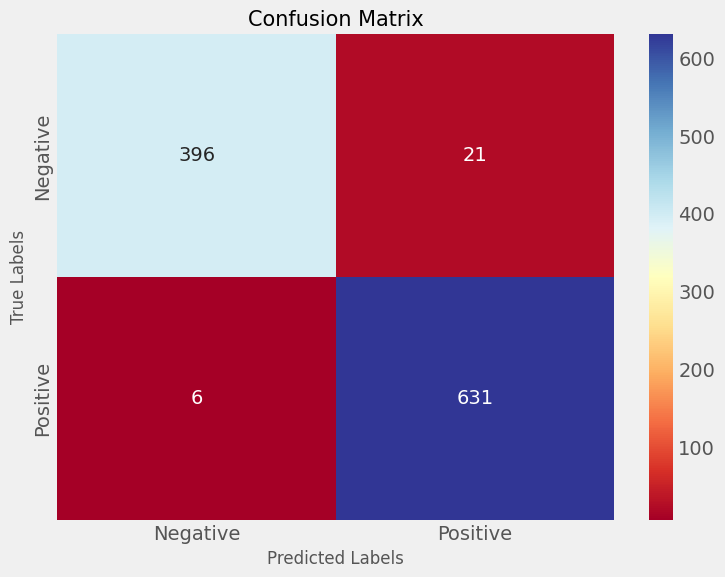

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdYlBu", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels",fontsize=12)
plt.ylabel("True Labels",fontsize=12)
plt.title("Confusion Matrix",fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import f1_score,precision_score, recall_score , accuracy_score

# Calculate precision and recall
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
accuracy=accuracy_score(true_labels, predicted_labels)

# Calculate F1 score
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')


Precision: 0.9678
Recall: 0.9906
Accuracy: 0.9744
F1 Score: 0.9791


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 34ms/step


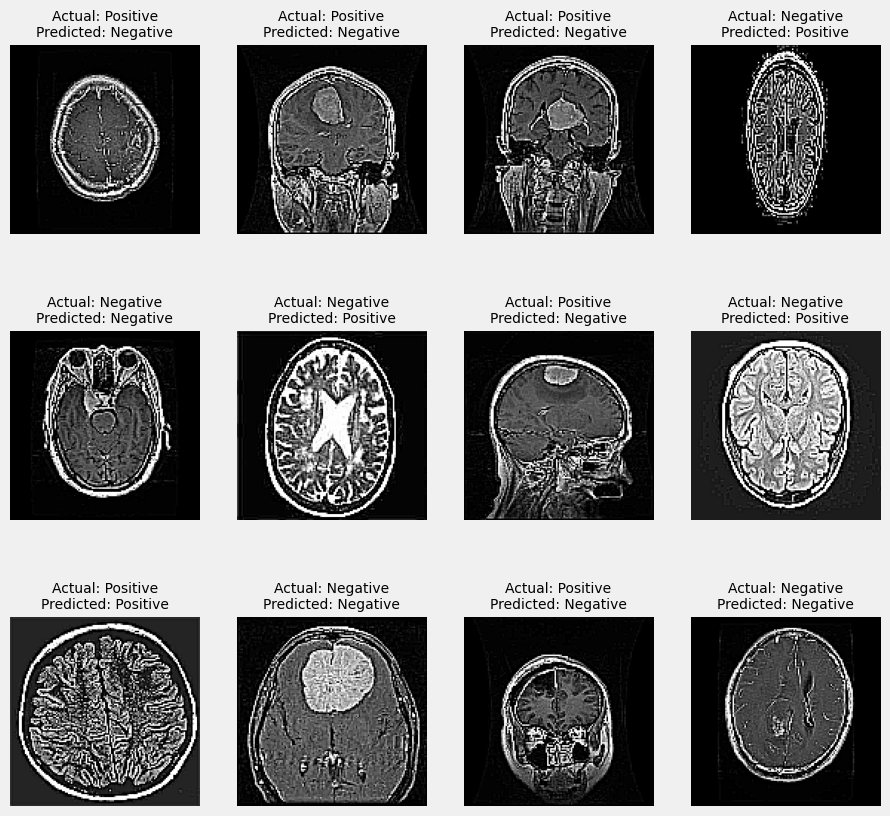

In [ ]:
plt.figure(figsize=(10, 10))

# some images  visualization
for i in range(12):
    image = x_test[i]
    label = label_batch[i]
    ax = plt.subplot(3, 4, i + 1)
    image_for_prediction = np.expand_dims(image, axis=0)
    predictions = model.predict(image_for_prediction)
    predicted_label = np.argmax(predictions)
    class_labels = ['Positive', 'Negative']
    predicted_class = class_labels[predicted_label]
    actual_class = classes[label]

    plt.imshow(image)
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}",fontsize=10)
    plt.axis("off")

plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 1 no.jpeg to 1 no.jpeg


1/1 [==============================] - 0s 51ms/step


Predicted class: Negative
Actual class: Negative


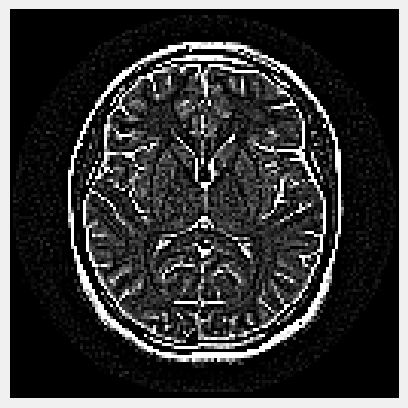

In [ ]:
image = cv2.imread('1 no.jpeg')
img = cv2.resize(image, (128, 128))
# Noramlize pixel value to [0 1]
img = img.astype(np.float32) / 255.0
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel_sharpening)
predictions = model.predict(np.expand_dims(img, axis=0))
predicted_label = np.argmax(predictions)
# dataset's class labels (0 for Negative, 1 for Positive)
class_labels = ['Negative', 'Positive']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')
print(f'Actual class: Negative')
plt.axis('off')
plt.imshow(img), plt.axis("off")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 32 no.jpg to 32 no.jpg


1/1 [==============================] - 0s 29ms/step


Predicted class: Negative
Actual class: Negative


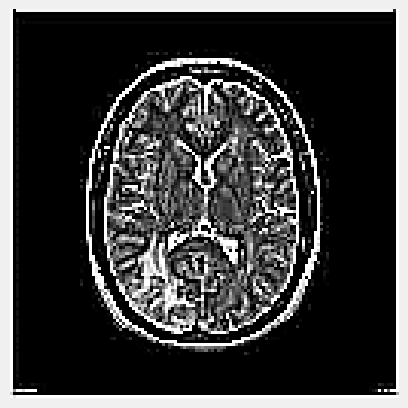

In [ ]:
image = cv2.imread('32 no.jpg')
img = cv2.resize(image, (128, 128))
# Noramlize pixel value to [0 1]
img = img.astype(np.float32) / 255.0
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel_sharpening)
predictions = model.predict(np.expand_dims(img, axis=0))
predicted_label = np.argmax(predictions)
# dataset's class labels (0 for Negative, 1 for Positive)
class_labels = ['Negative', 'Positive']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')
print(f'Actual class: Negative')
plt.axis('off')
plt.imshow(img), plt.axis("off")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


1/1 [==============================] - 0s 25ms/step


Predicted class: Negative
Actual class: Negative


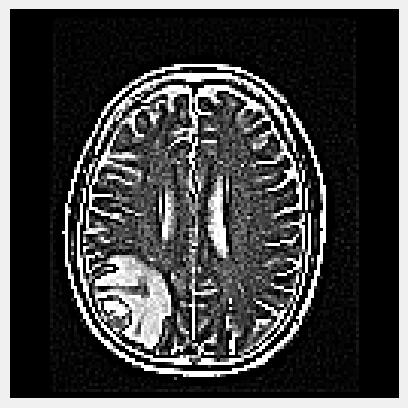

In [ ]:
image = cv2.imread('Y107.jpg')
img = cv2.resize(image, (128, 128))
# Noramlize pixel value to [0 1]
img = img.astype(np.float32) / 255.0
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel_sharpening)
predictions = model.predict(np.expand_dims(img, axis=0))
predicted_label = np.argmax(predictions)
# dataset's class labels (0 for Negative, 1 for Positive)
class_labels = ['Negative', 'Positive']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')
print(f'Actual class: Positive')
plt.axis('off')
plt.imshow(img), plt.axis("off")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

1/1 [==============================] - 0s 31ms/step


Predicted class: Positive
Actual class: Positive


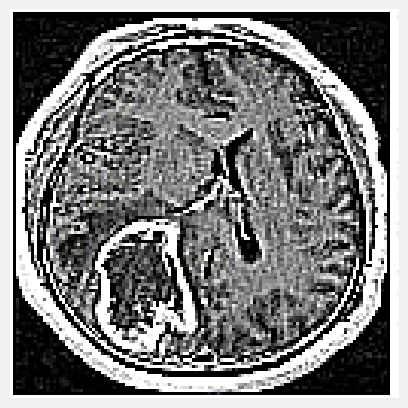

In [ ]:
image = cv2.imread('Y109.jpg')
img = cv2.resize(image, (128, 128))
# Noramlize pixel value to [0 1]
img = img.astype(np.float32) / 255.0
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel_sharpening)
predictions = model.predict(np.expand_dims(img, axis=0))
predicted_label = np.argmax(predictions)
# dataset's class labels (0 for Negative, 1 for Positive)
class_labels = ['Negative', 'Positive']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')
print(f'Actual class: Positive')
plt.axis('off')
plt.imshow(img), plt.axis("off")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample.zip to sample.zip


In [ ]:
! unzip /content/sample.zip

Archive:  /content/sample.zip
   creating: sample/
   creating: sample/no/
  inflating: sample/no/no100.jpg     
  inflating: sample/no/1 no.jpeg     
  inflating: sample/no/10 no.jpg     
  inflating: sample/no/32 no.jpg     
  inflating: sample/no/No12.jpg      
  inflating: sample/no/No18.jpg      
   creating: sample/yes/
  inflating: sample/yes/y0.jpg       
  inflating: sample/yes/y1.jpg       
  inflating: sample/yes/Y100.jpg     
  inflating: sample/yes/y101.jpg     
  inflating: sample/yes/Y107.jpg     
  inflating: sample/yes/Y109.jpg     
  inflating: sample/yes/y1004.jpg    


In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Assuming 'model' is already defined before this code
# initialize lists to store images and labels
Positive_file = '/content/sample/yes'
Negative_file = '/content/sample/no'
images = []
labels = []

# load and preprocess Negative images
for filename in os.listdir(Negative_file):
    if filename.endswith('.jpg'):
        original_img = cv2.imread(os.path.join(Negative_file, filename))
        # resize the image to a common size
        img = cv2.resize(original_img, (128, 128))
        # Normalize pixel value to [0 1]
        img = img.astype(np.float32) / 255.0
        # Sharpen Image
        kernel_sharpening = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        img = cv2.filter2D(img, -1, kernel_sharpening)
        images.append(img)
        labels.append(0)  # 0 represents Negative_file

# load and preprocess Positive images
for filename in os.listdir(Positive_file):
    if filename.endswith('.jpg'):
        original_img = cv2.imread(os.path.join(Positive_file, filename))
        # resize the image to a common size
        img = cv2.resize(original_img, (128, 128))
        # Normalize pixel value to [0 1]
        img = img.astype(np.float32) / 255.0
        # Sharpen Image
        kernel_sharpening = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        img = cv2.filter2D(img, -1, kernel_sharpening)
        images.append(img)
        labels.append(1)  # 1 represents Positive_file



1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 214ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 80ms/step


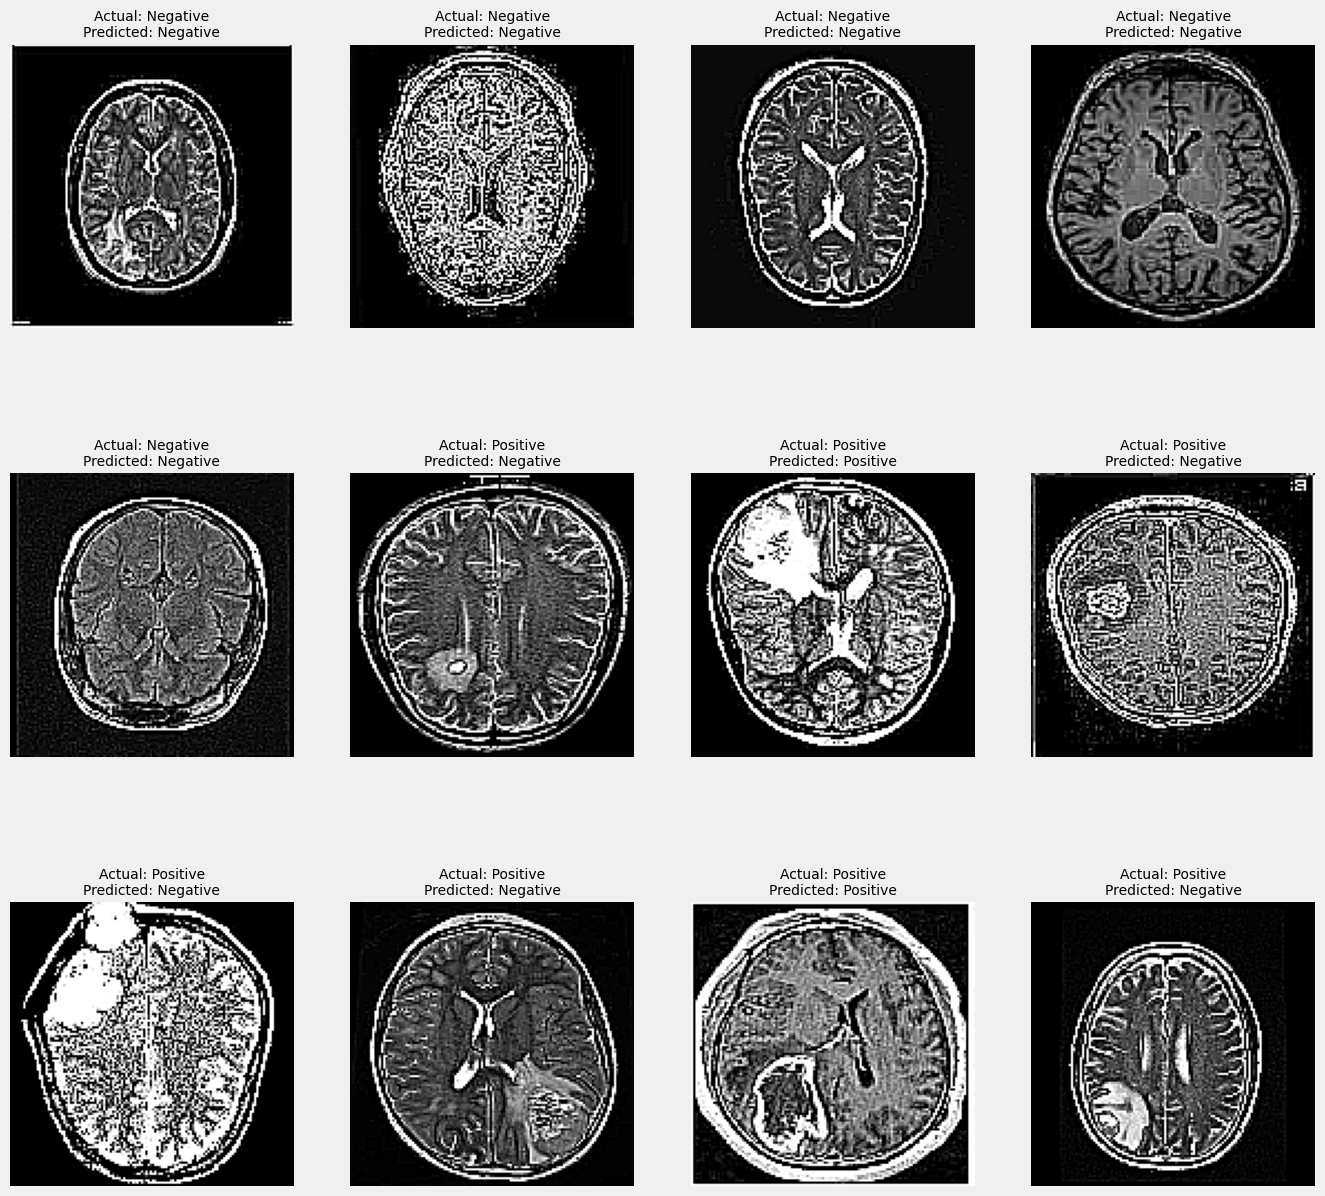

In [ ]:
plt.figure(figsize=(10, 10))

# some images  visualization
for i in range(13):
    image = x_test[i]
    label = label_batch[i]
    ax = plt.subplot(3, 4, i + 1)
    image_for_prediction = np.expand_dims(image, axis=0)
    predictions = model.predict(image_for_prediction)
    predicted_label = np.argmax(predictions)
    class_labels = ['Positive', 'Negative']
    predicted_class = class_labels[predicted_label]
    actual_class = classes[label]

    plt.imshow(image)
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}",fontsize=10)
    plt.axis("off")

plt.show(

In [ ]:
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
